# Notebook 3: Machine Learning Básico

**Objetivo:** Implementar modelos de clasificación y regresión con Scikit-learn

**Autor:** JOSE LUIS RODRIGUEZ FLORES  **Fecha:** 23 NOVIEMBRE 2025

In [19]:
# Importar TensorFlow primero
import tensorflow as tf

print("GPU disponible:", tf.config.list_physical_devices('GPU'))
 # Instalar librerías adicionales si es necesario
!pip install seaborn plotly

# Importaciones estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")


GPU disponible: []
Entorno configurado correctamente en Google Colab


# Clasificacion con Titanic
#  Clasificación Binaria - Titanic (Supervivencia)

In [12]:
# Cargar y preparar Titanic
titanic = sns.load_dataset('titanic')

# Seleccionar features y limpiar datos
titanic_clean = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'survived']].dropna()
titanic_clean['sex'] = titanic_clean['sex'].map({'male': 0, 'female': 1})

# Separar features y target
X_titanic = titanic_clean.drop('survived', axis=1)
y_titanic = titanic_clean['survived']

# Split train/test
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=42)

# Escalar datos
scaler_t = StandardScaler()
X_train_t_scaled = scaler_t.fit_transform(X_train_t)
X_test_t_scaled = scaler_t.transform(X_test_t)

print("=== DATASET TITANIC ===")
print(f"Datos de entrenamiento: {X_train_t.shape}")
print(f"Datos de prueba: {X_test_t.shape}")
print(f"Distribución de clases: {y_titanic.value_counts().to_dict()}")

=== DATASET TITANIC ===
Datos de entrenamiento: (571, 6)
Datos de prueba: (143, 6)
Distribución de clases: {0: 424, 1: 290}


In [13]:
# Importar modelos específicos
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Modelos importados correctamente")

Modelos importados correctamente


# Modelos Titanic


Logistic Regression:
  Accuracy: 0.7483
              precision    recall  f1-score   support

           0       0.78      0.82      0.80        87
           1       0.69      0.64      0.67        56

    accuracy                           0.75       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.75      0.75      0.75       143


Decision Tree:
  Accuracy: 0.7133
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        87
           1       0.63      0.66      0.64        56

    accuracy                           0.71       143
   macro avg       0.70      0.70      0.70       143
weighted avg       0.72      0.71      0.71       143


Random Forest:
  Accuracy: 0.7832
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        87
           1       0.74      0.70      0.72        56

    accuracy                           0.78       143
   macro avg     

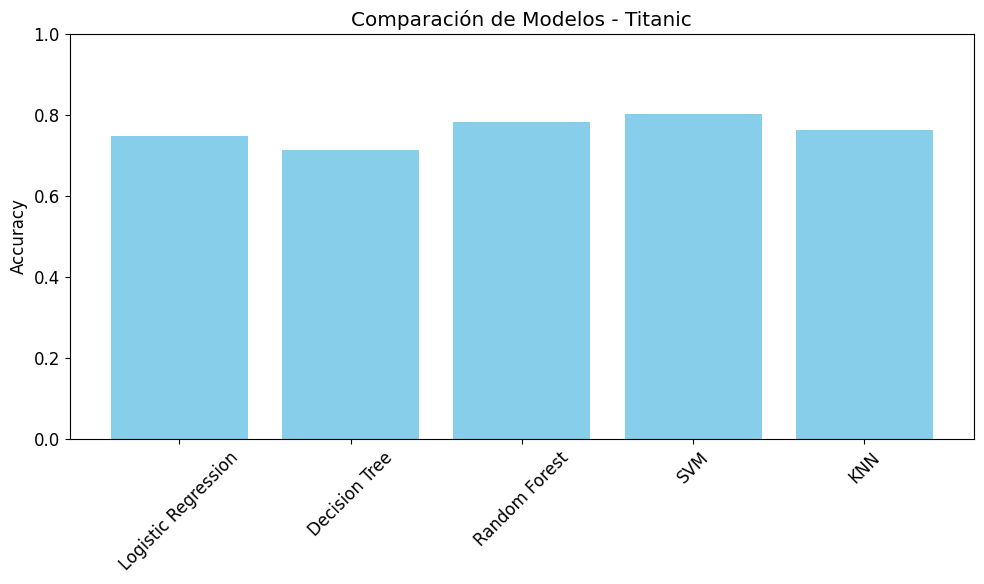

In [14]:
# Entrenar múltiples modelos
modelos_titanic = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

resultados_titanic = {}

for nombre, modelo in modelos_titanic.items():
    modelo.fit(X_train_t_scaled, y_train_t)
    y_pred = modelo.predict(X_test_t_scaled)
    accuracy = accuracy_score(y_test_t, y_pred)
    resultados_titanic[nombre] = accuracy
    print(f"\n{nombre}:")
    print(f"  Accuracy: {accuracy:.4f}")
    print(classification_report(y_test_t, y_pred, zero_division=0))

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.bar(resultados_titanic.keys(), resultados_titanic.values(), color='skyblue')
plt.title('Comparación de Modelos - Titanic')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig('titanic_modelos.png', dpi=300, bbox_inches='tight')
plt.show()

# Clasificación Multiclase con Iris


Logistic Regression: Accuracy = 1.0000

Decision Tree: Accuracy = 1.0000

Random Forest: Accuracy = 1.0000

SVM: Accuracy = 1.0000

KNN: Accuracy = 1.0000


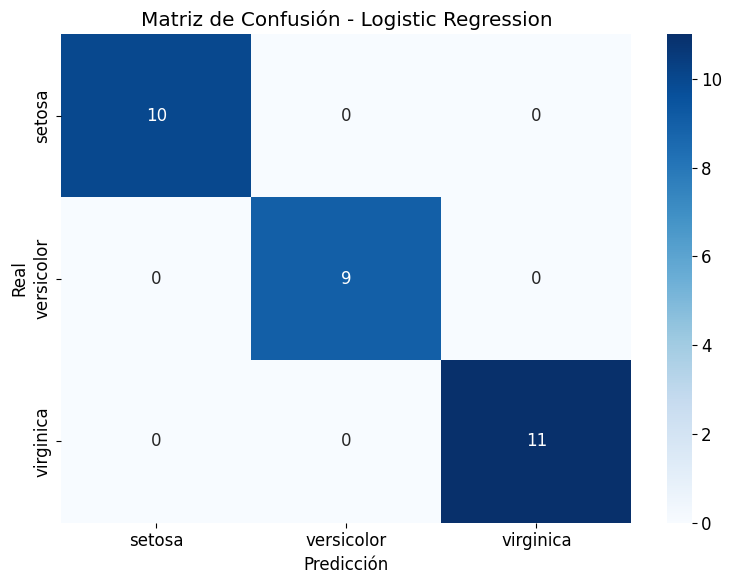


Mejor modelo: Logistic Regression con accuracy 1.0000


In [15]:
# Cargar Iris
iris = sns.load_dataset('iris')
X_iris = iris.drop('species', axis=1)
y_iris = iris['species']

# Split y escalar
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)
scaler_i = StandardScaler()
X_train_i_scaled = scaler_i.fit_transform(X_train_i)
X_test_i_scaled = scaler_i.transform(X_test_i)

# Entrenar modelos
modelos_iris = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3)
}

resultados_iris = {}

for nombre, modelo in modelos_iris.items():
    modelo.fit(X_train_i_scaled, y_train_i)
    y_pred = modelo.predict(X_test_i_scaled)
    accuracy = accuracy_score(y_test_i, y_pred)
    resultados_iris[nombre] = accuracy
    print(f"\n{nombre}: Accuracy = {accuracy:.4f}")

# Mejor modelo - Matriz de confusión
mejor_modelo = max(resultados_iris, key=resultados_iris.get)
modelo_final = modelos_iris[mejor_modelo]
modelo_final.fit(X_train_i_scaled, y_train_i)
y_pred_final = modelo_final.predict(X_test_i_scaled)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_i, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris['species'].unique(),
            yticklabels=iris['species'].unique())
plt.title(f'Matriz de Confusión - {mejor_modelo}')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.tight_layout()
plt.savefig('iris_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nMejor modelo: {mejor_modelo} con accuracy {resultados_iris[mejor_modelo]:.4f}")


# Clasificación con Wine

=== WINE CLASSIFICATION ===
Accuracy: 1.0000

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



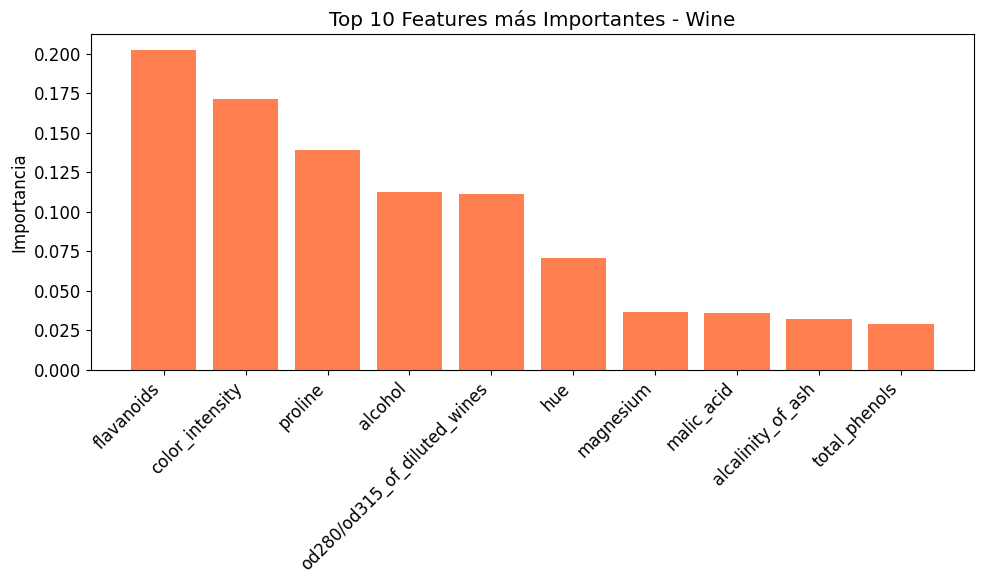

In [16]:
# Cargar Wine
from sklearn.datasets import load_wine
wine_data = load_wine()
X_wine = wine_data.data
y_wine = wine_data.target

# Split y escalar
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)
scaler_w = StandardScaler()
X_train_w_scaled = scaler_w.fit_transform(X_train_w)
X_test_w_scaled = scaler_w.transform(X_test_w)

# Entrenar Random Forest
rf_wine = RandomForestClassifier(n_estimators=100, random_state=42)
rf_wine.fit(X_train_w_scaled, y_train_w)
y_pred_w = rf_wine.predict(X_test_w_scaled)

accuracy_wine = accuracy_score(y_test_w, y_pred_w)
print(f"=== WINE CLASSIFICATION ===")
print(f"Accuracy: {accuracy_wine:.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test_w, y_pred_w))

# Feature importance
importances = rf_wine.feature_importances_
indices = np.argsort(importances)[::-1][:10]

plt.figure(figsize=(10, 6))
plt.bar(range(10), importances[indices], color='coral')
plt.xticks(range(10), [wine_data.feature_names[i] for i in indices], rotation=45, ha='right')
plt.title('Top 10 Features más Importantes - Wine')
plt.ylabel('Importancia')
plt.tight_layout()
plt.savefig('wine_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Regresión con Boston Housing


Linear Regression:
  MSE: 482.85
  R²: 0.9813

Ridge:
  MSE: 485.64
  R²: 0.9812

Random Forest:
  MSE: 5744.63
  R²: 0.7776


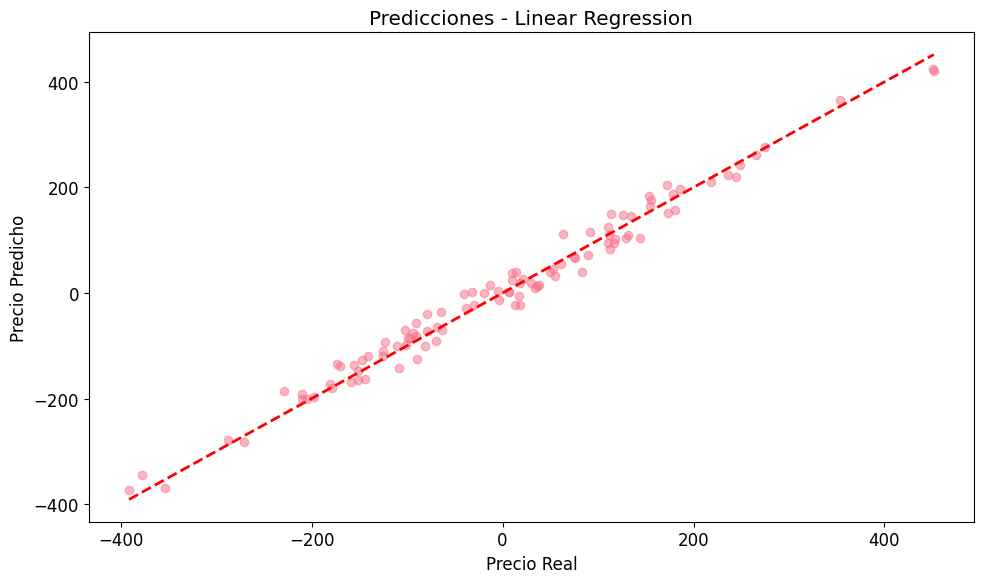


Mejor modelo: Linear Regression


In [20]:
# Crear Boston sintético
from sklearn.datasets import make_regression
X_boston, y_boston = make_regression(n_samples=506, n_features=13, noise=20, random_state=42)

# Split y escalar
X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)
scaler_b = StandardScaler()
X_train_b_scaled = scaler_b.fit_transform(X_train_b)
X_test_b_scaled = scaler_b.transform(X_test_b)

# Entrenar modelos de regresión
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

modelos_regresion = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

resultados_boston = {}

for nombre, modelo in modelos_regresion.items():
    modelo.fit(X_train_b_scaled, y_train_b)
    y_pred = modelo.predict(X_test_b_scaled)
    mse = mean_squared_error(y_test_b, y_pred)
    r2 = r2_score(y_test_b, y_pred)
    resultados_boston[nombre] = {'MSE': mse, 'R2': r2}
    print(f"\n{nombre}:")
    print(f"  MSE: {mse:.2f}")
    print(f"  R²: {r2:.4f}")

# Visualizar predicciones del mejor modelo
mejor_modelo_reg = max(resultados_boston, key=lambda x: resultados_boston[x]['R2'])
modelo_final_reg = modelos_regresion[mejor_modelo_reg]
modelo_final_reg.fit(X_train_b_scaled, y_train_b)
y_pred_final_reg = modelo_final_reg.predict(X_test_b_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_b, y_pred_final_reg, alpha=0.5)
plt.plot([y_test_b.min(), y_test_b.max()], [y_test_b.min(), y_test_b.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title(f'Predicciones - {mejor_modelo_reg}')
plt.tight_layout()
plt.savefig('boston_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nMejor modelo: {mejor_modelo_reg}")

# Clasificación con Digits

=== DIGITS CLASSIFICATION ===
Accuracy: 0.9722


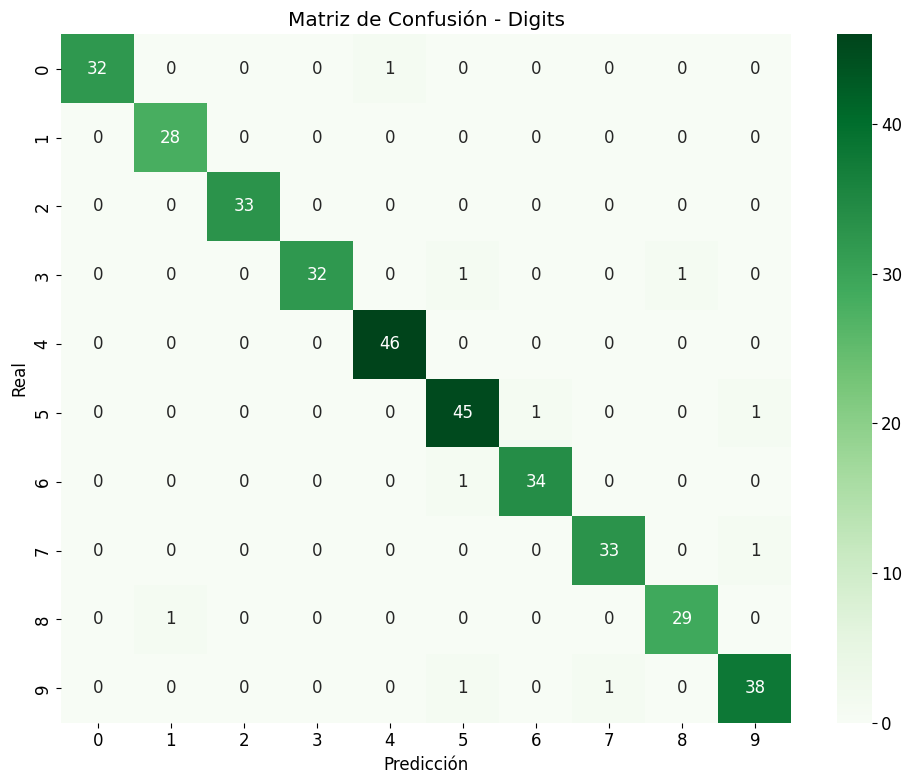

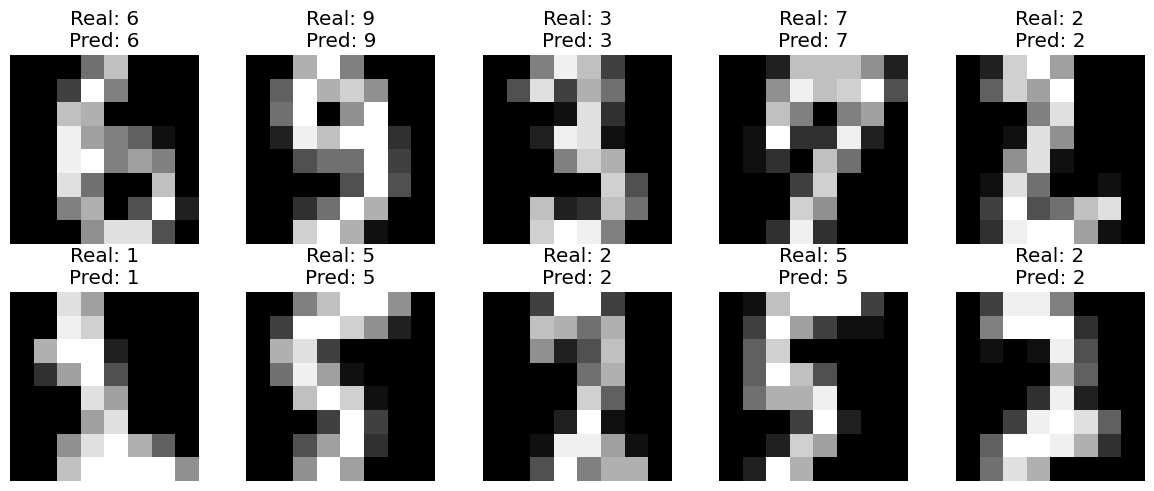

In [21]:
# Cargar Digits
from sklearn.datasets import load_digits
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

# Split y escalar
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_digits, y_digits, test_size=0.2, random_state=42)
scaler_d = StandardScaler()
X_train_d_scaled = scaler_d.fit_transform(X_train_d)
X_test_d_scaled = scaler_d.transform(X_test_d)

# Entrenar Random Forest
rf_digits = RandomForestClassifier(n_estimators=100, random_state=42)
rf_digits.fit(X_train_d_scaled, y_train_d)
y_pred_d = rf_digits.predict(X_test_d_scaled)

accuracy_digits = accuracy_score(y_test_d, y_pred_d)
print(f"=== DIGITS CLASSIFICATION ===")
print(f"Accuracy: {accuracy_digits:.4f}")

# Matriz de confusión
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_d, y_pred_d)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusión - Digits')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.tight_layout()
plt.savefig('digits_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Ejemplos de predicciones
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_d[i].reshape(8, 8), cmap='gray')
    ax.set_title(f'Real: {y_test_d.iloc[i] if hasattr(y_test_d, "iloc") else y_test_d[i]}\nPred: {y_pred_d[i]}')
    ax.axis('off')
plt.tight_layout()
plt.savefig('digits_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

# Comparación Final

In [22]:
# Resumen de todos los modelos
print("=" * 60)
print("RESUMEN FINAL DE MODELOS")
print("=" * 60)
print(f"\nTitanic (Clasificación Binaria):")
print(f"  Mejor modelo: {max(resultados_titanic, key=resultados_titanic.get)}")
print(f"  Accuracy: {max(resultados_titanic.values()):.4f}")

print(f"\nIris (Clasificación Multiclase):")
print(f"  Mejor modelo: {max(resultados_iris, key=resultados_iris.get)}")
print(f"  Accuracy: {max(resultados_iris.values()):.4f}")

print(f"\nWine (Clasificación Multiclase):")
print(f"  Accuracy: {accuracy_wine:.4f}")

print(f"\nBoston (Regresión):")
print(f"  Mejor modelo: {mejor_modelo_reg}")
print(f"  R²: {resultados_boston[mejor_modelo_reg]['R2']:.4f}")

print(f"\nDigits (Clasificación de Imágenes):")
print(f"  Accuracy: {accuracy_digits:.4f}")

print("\n" + "=" * 60)

RESUMEN FINAL DE MODELOS

Titanic (Clasificación Binaria):
  Mejor modelo: SVM
  Accuracy: 0.8042

Iris (Clasificación Multiclase):
  Mejor modelo: Logistic Regression
  Accuracy: 1.0000

Wine (Clasificación Multiclase):
  Accuracy: 1.0000

Boston (Regresión):
  Mejor modelo: Linear Regression
  R²: 0.9813

Digits (Clasificación de Imágenes):
  Accuracy: 0.9722



## Conclusiones del Autor

### Modelos Implementados:
**Logistic Regression:** Clasificación binaria y multiclase
**Decision Tree:** Modelos interpretables
**Random Forest:** Alto rendimiento en todos los datasets
**SVM:** Clasificación con márgenes óptimos
**KNN:** Clasificación basada en vecinos

### Datasets Analizados:
**Titanic:** Clasificación binaria (supervivencia)

**Iris:** Clasificación multiclase (3 especies)

**Wine:** Clasificación multiclase (3 tipos)

**Boston Housing:** Regresión (predicción de precios)

**Digits:** Clasificación de imágenes (10 dígitos)

##Aprendizajes respecto a lo realizado en el cuaderno
Preprocesamiento de datos y normalización

División train/test

Evaluación con múltiples métricas

Comparación de algoritmos

Interpretación de resultados